# Data 301 Group 11 Project
## Data Loading and Wrangling Functions

## Data Loading

### Import Package Statements

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np

### Loading data into pd dataframes

In [33]:
StatCanCPI = []
StatCanBCHPI = []
StatCanCanadaHPI = []
CanadaPIR = []
WorldBankData = []
def loadStatCanCPI():
    StatCanCPI = pd.read_csv('./processed/preprocessed/Stat_Can_CPI_1985_to_Now.csv')
    StatCanCPI = StatCanCPI.set_index('Products and product groups 4')
    return StatCanCPI
def loadStatCanBCHPIData():
    StatCanBCHPI = pd.read_csv('./processed/preprocessed/Stat_Can_HPI_BC-only_1986_to_2021_May.csv')
    StatCanBCHPI = StatCanBCHPI.drop(index=[1,2],axis=0)
    asdf = [col for col in StatCanBCHPI.columns if 'Jan' in col]
    asdf2 = []
    for x in range(len(asdf)):
        if asdf[x][4:6] != "an":
            if (int(asdf[x][4:6])) > 80:
                asdf2.append("19"+ asdf[x][4:6])
            elif int(asdf[x][4:6]) == 0:
                asdf2.append("20" + asdf[x][4:6]) 
        else: asdf2.append("20" + asdf[x][0:2])
    StatCanBCHPI = StatCanBCHPI[asdf].set_axis(asdf2, axis='columns')
    StatCanBCHPI = StatCanBCHPI.set_axis(['BC New Housing Price Index'], axis='index')
    return StatCanBCHPI
def loadStatCanCanadaHPIData():
    StatCanCanadaHPI = pd.read_csv('./processed/preprocessed/Stat_Can_HPI_Canada_1981_to_2021_May.csv')
    return StatCanCanadaHPI
def loadCanadaPrimeInterestRate():
    CanadaPIR = pd.read_csv('./processed/preprocessed/Canada-Prime-Rate-History.csv')
    CanadaPIR = CanadaPIR.transpose()
    CanadaPIR.columns = CanadaPIR.iloc[0]
    CanadaPIR.drop(index=CanadaPIR.index[0], axis=0, inplace=True)
    return CanadaPIR
def loadWorldBankData():
    WorldBankData = pd.read_csv('./processed/preprocessed/World Bank Data - Indicators.csv')
    WorldBankData = WorldBankData.set_index('Year')
    #WorldBankData.drop(index=WorldBankData.index[1], axis=0, inplace=True)
    return WorldBankData

In [34]:
def loadAll():
    StatCanCPI = loadStatCanCPI()
    StatCanBCHPI = loadStatCanBCHPIData()
    StatCanCanadaHPI = loadStatCanCanadaHPIData()
    CanadaPIR = loadCanadaPrimeInterestRate()
    WorldBankData = loadWorldBankData()
    dataFrames = [StatCanCPI, StatCanBCHPI, CanadaPIR, WorldBankData]
    return dataFrames
ourData = loadAll()
#Merging StatCanCPI and WorldBankData as both are yearly sets. 
masterDF = ourData[0].append(ourData[3].append(ourData[1])).sort_index(axis=1).convert_dtypes(int)
#collecting 2000 to 2021 data.
masterDFFrom2000to2021 = masterDF.iloc[:, masterDF.shape[1]-21:masterDF.shape[1]-1]

In [35]:
ourData[3]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Year,,,,,,,,,,,,,,,,,,,,,
"Unemployment, total (% of total labor force) (modeled ILO estimate)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.510000e+00,7.290000e+00,7.070000e+00,6.910000e+00,6.910000e+00,7.000000e+00,6.340000e+00,5.830000e+00,5.660000e+00,9.480000e+00
"Unemployment with advanced education, male (% of male labor force with advanced education)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.750000e+00,5.730000e+00,5.540000e+00,5.590000e+00,5.600000e+00,5.930000e+00,5.270000e+00,4.790000e+00,4.650000e+00,7.430000e+00
"Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.641000e+01,6.625000e+01,6.622000e+01,6.576000e+01,6.561000e+01,6.549000e+01,6.559000e+01,6.526000e+01,6.557000e+01,6.391000e+01
"Employment to population ratio, ages 15-24, total (%) (national estimate)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.531000e+01,5.434000e+01,5.506000e+01,5.555000e+01,5.576000e+01,5.538000e+01,5.648000e+01,5.630000e+01,5.747000e+01,4.928000e+01
Gross savings (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.085711e+01,2.091795e+01,2.159730e+01,2.214849e+01,1.956936e+01,1.914645e+01,1.984528e+01,1.950003e+01,2.001164e+01,1.871884e+01
GDP per capita (current US$),2.259294e+03,2.240433e+03,2.268585e+03,2.374498e+03,2.555111e+03,2.770362e+03,3.047106e+03,3.217159e+03,3.462679e+03,3.763953e+03,...,5.222370e+04,5.266909e+04,5.263517e+04,5.095600e+04,4.359614e+04,4.231560e+04,4.512936e+04,4.645474e+04,4.632667e+04,4.324162e+04
Adjusted net national income (constant 2010 US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.370000e+12,1.390000e+12,1.430000e+12,1.460000e+12,1.430000e+12,1.440000e+12,1.510000e+12,1.540000e+12,1.580000e+12,NaN
Export value index (2000 = 100),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.631623e+02,1.647013e+02,1.656868e+02,1.721876e+02,1.482419e+02,1.409860e+02,1.520750e+02,1.629638e+02,1.615493e+02,NaN
"Merchandise imports by the reporting economy, residual (% of total merchandise imports)",7.099567e+00,3.216283e+00,4.465681e+00,3.956761e+00,4.557415e+00,5.804448e+00,7.385699e+00,3.609857e+00,4.818492e+00,4.014679e+00,...,8.959329e-01,7.490796e-01,7.429469e-01,7.116309e-01,9.661496e-01,7.270159e-01,7.057034e-01,7.222333e-01,7.404451e-01,NaN


<AxesSubplot:xlabel='Date'>

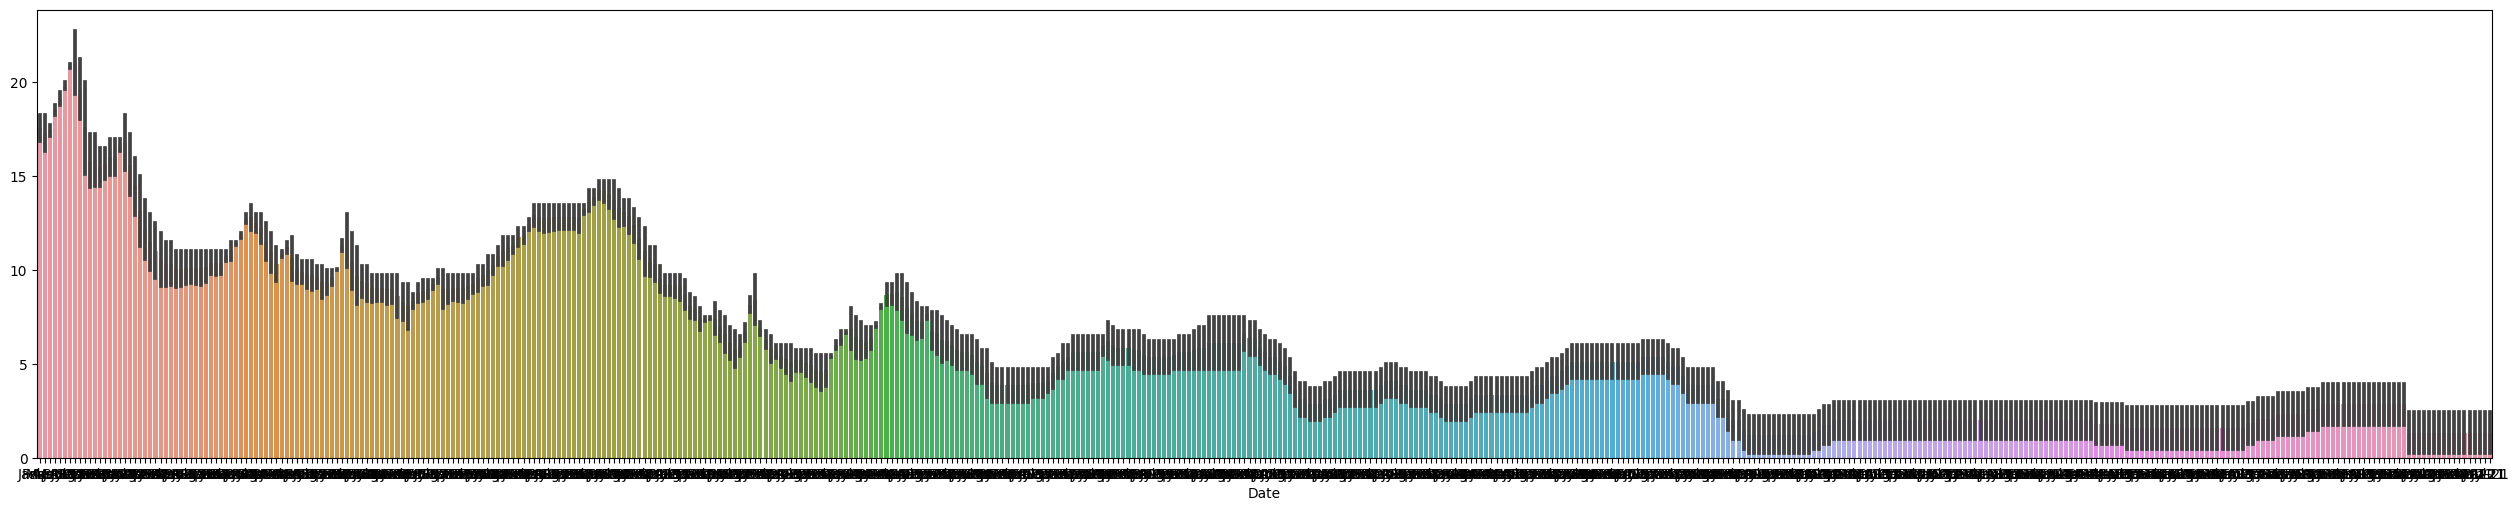

In [36]:
ourData[2]
figure(figsize=(32,6),dpi=99)
sns.barplot(data = ourData[2])

In [37]:
MasterDataDF = []


In [38]:
ourData[0].transpose()

Products and product groups 4,All-items,Food,Shelter,"Household operations, furnishings and equipment",Clothing and footwear,Transportation,Gasoline,Health and personal care,"Recreation, education and reading","Alcoholic beverages, tobacco products and recreational cannabis",All-items excluding food and energy,All-items excluding energy,Energy,Goods,Services
1985,63.0,65.5,65.6,72.3,71.5,59.2,73.5,63.2,57.7,42.8,62.0,62.7,67.3,67.5,58.2
1986,65.6,68.8,67.5,74.5,73.4,61.0,65.4,65.9,60.7,47.9,65.3,65.9,62.5,69.8,61.2
1987,68.5,71.8,70.5,76.7,76.5,63.3,68.5,69.3,63.7,51.1,68.3,68.9,64.1,72.6,64.1
1988,71.2,73.7,73.8,79.6,80.5,64.5,67.9,72.3,67.3,54.9,71.5,71.9,64.5,75.2,67.1
1989,74.8,76.5,78.1,82.5,83.7,67.8,72.1,75.5,70.3,59.9,75.5,75.6,66.7,78.4,70.9
1990,78.4,79.6,82.5,84.2,86.1,71.6,82.7,79.1,73.2,65.2,78.8,78.9,73.4,81.6,74.9
1991,82.8,83.4,86.3,87.4,94.3,72.9,81.5,84.7,78.3,76.4,83.4,83.4,77.0,85.7,79.6
1992,84.0,83.1,87.9,87.9,95.1,74.4,78.6,86.6,79.2,81.0,85.1,84.7,77.2,86.4,81.4
1993,85.6,84.5,89.1,88.7,96.0,76.8,77.4,88.9,81.1,82.2,86.8,86.3,78.1,87.8,83.1
1994,85.7,84.9,89.4,88.9,96.8,80.2,76.5,89.7,83.5,68.8,86.9,86.4,78.6,86.8,84.5


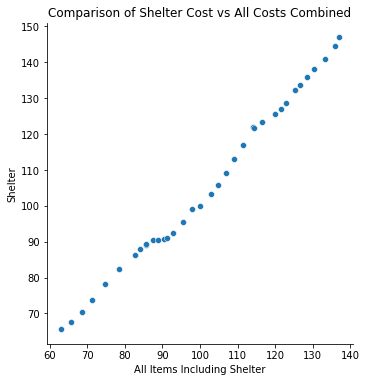

In [39]:
ourData[0]

ax = sns.relplot(x="All-items", y="Shelter", data=ourData[0].transpose())
ax.set(xlabel="All Items Including Shelter", ylabel="Shelter", title="Comparison of Shelter Cost vs All Costs Combined")


In [40]:
ourData[2]

Date,Jan-81,Feb-81,Mar-81,Apr-81,May-81,Jun-81,Jul-81,Aug-81,Sep-81,Oct-81,...,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21
Prime Rate,18.25,18.25,17.75,18.25,19.5,20.0,21.0,22.75,21.25,20.0,...,2.45,2.45,2.45,2.45,2.45,2.45,2.45,2.45,2.45,2.45
Bank of Canada Overnight Rate,16.89,16.34,17.15,18.81,18.82,19.64,20.78,19.38,18.05,15.15,...,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25


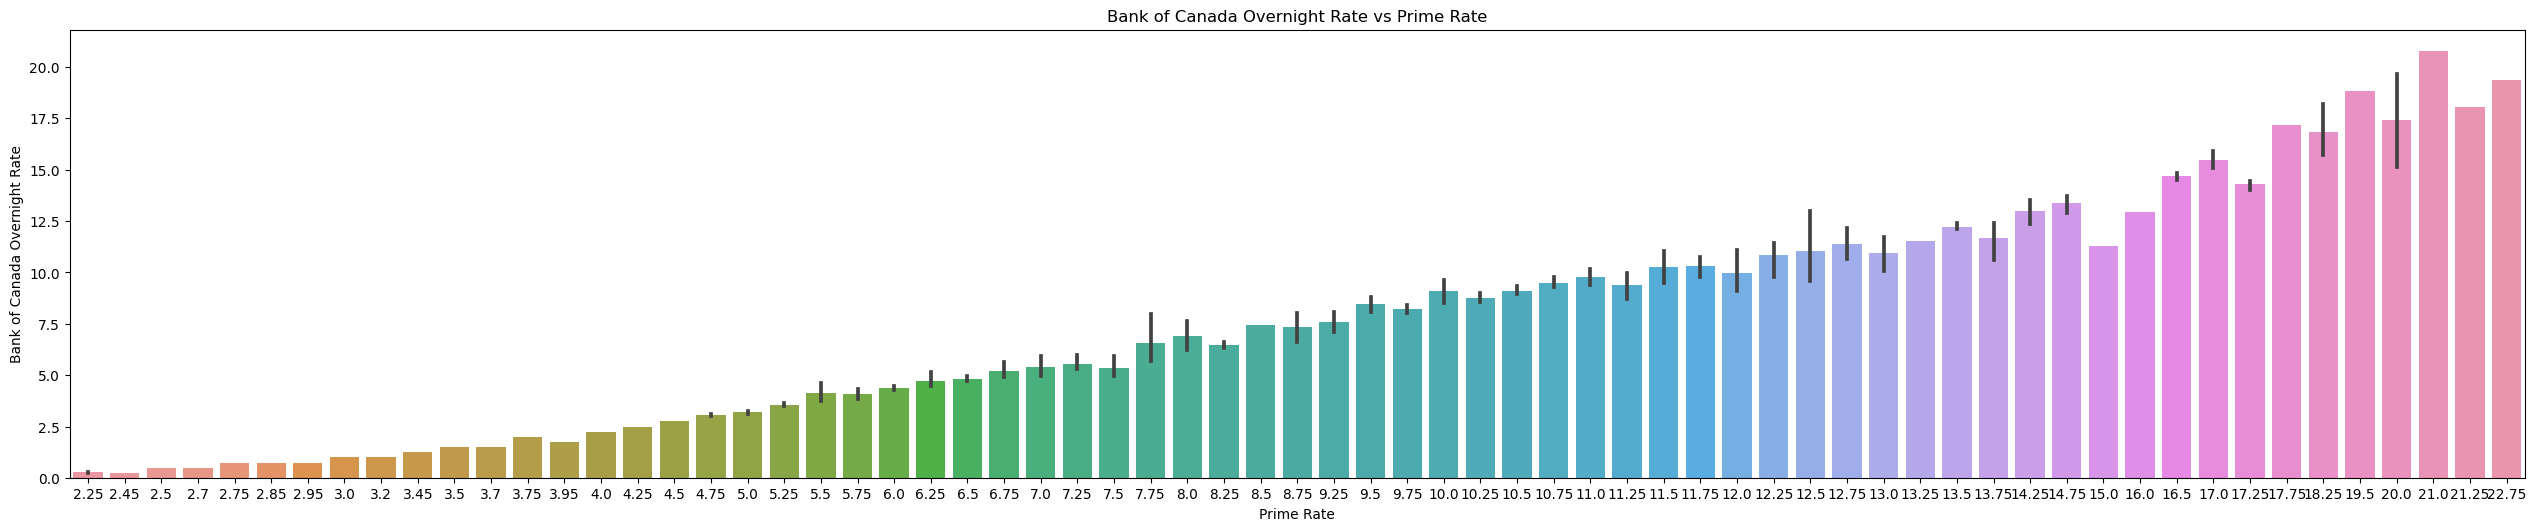

In [41]:
figure(figsize=(32,6),dpi=99)
sns.barplot(x="Prime Rate", y="Bank of Canada Overnight Rate", data=ourData[2].transpose())


plt.title("Bank of Canada Overnight Rate vs Prime Rate")

plt.show()

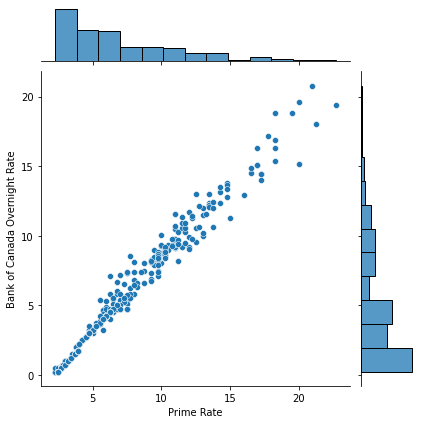

In [42]:
sns.jointplot(x="Prime Rate", y="Bank of Canada Overnight Rate", data=ourData[2].transpose(), kind="scatter")


In [43]:

#pp1 = sns.pairplot(ourData[1], corner=True, height=1.2, aspect=.95)
#sns.axes_style("white");

In [44]:
ourData[1]

,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
BC New Housing Price Index,66.3,67.1,70.9,76.9,93.1,81.8,85.3,92.7,97.1,93.6,...,96.3,95.3,94.3,93.6,96.3,99.9,107.8,107.6,105.5,112.3


In [45]:
ourData[2]

Date,Jan-81,Feb-81,Mar-81,Apr-81,May-81,Jun-81,Jul-81,Aug-81,Sep-81,Oct-81,...,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21
Prime Rate,18.25,18.25,17.75,18.25,19.5,20.0,21.0,22.75,21.25,20.0,...,2.45,2.45,2.45,2.45,2.45,2.45,2.45,2.45,2.45,2.45
Bank of Canada Overnight Rate,16.89,16.34,17.15,18.81,18.82,19.64,20.78,19.38,18.05,15.15,...,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25


In [46]:
ourData[3]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Year,,,,,,,,,,,,,,,,,,,,,
"Unemployment, total (% of total labor force) (modeled ILO estimate)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.510000e+00,7.290000e+00,7.070000e+00,6.910000e+00,6.910000e+00,7.000000e+00,6.340000e+00,5.830000e+00,5.660000e+00,9.480000e+00
"Unemployment with advanced education, male (% of male labor force with advanced education)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.750000e+00,5.730000e+00,5.540000e+00,5.590000e+00,5.600000e+00,5.930000e+00,5.270000e+00,4.790000e+00,4.650000e+00,7.430000e+00
"Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.641000e+01,6.625000e+01,6.622000e+01,6.576000e+01,6.561000e+01,6.549000e+01,6.559000e+01,6.526000e+01,6.557000e+01,6.391000e+01
"Employment to population ratio, ages 15-24, total (%) (national estimate)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.531000e+01,5.434000e+01,5.506000e+01,5.555000e+01,5.576000e+01,5.538000e+01,5.648000e+01,5.630000e+01,5.747000e+01,4.928000e+01
Gross savings (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.085711e+01,2.091795e+01,2.159730e+01,2.214849e+01,1.956936e+01,1.914645e+01,1.984528e+01,1.950003e+01,2.001164e+01,1.871884e+01
GDP per capita (current US$),2.259294e+03,2.240433e+03,2.268585e+03,2.374498e+03,2.555111e+03,2.770362e+03,3.047106e+03,3.217159e+03,3.462679e+03,3.763953e+03,...,5.222370e+04,5.266909e+04,5.263517e+04,5.095600e+04,4.359614e+04,4.231560e+04,4.512936e+04,4.645474e+04,4.632667e+04,4.324162e+04
Adjusted net national income (constant 2010 US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.370000e+12,1.390000e+12,1.430000e+12,1.460000e+12,1.430000e+12,1.440000e+12,1.510000e+12,1.540000e+12,1.580000e+12,NaN
Export value index (2000 = 100),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.631623e+02,1.647013e+02,1.656868e+02,1.721876e+02,1.482419e+02,1.409860e+02,1.520750e+02,1.629638e+02,1.615493e+02,NaN
"Merchandise imports by the reporting economy, residual (% of total merchandise imports)",7.099567e+00,3.216283e+00,4.465681e+00,3.956761e+00,4.557415e+00,5.804448e+00,7.385699e+00,3.609857e+00,4.818492e+00,4.014679e+00,...,8.959329e-01,7.490796e-01,7.429469e-01,7.116309e-01,9.661496e-01,7.270159e-01,7.057034e-01,7.222333e-01,7.404451e-01,NaN


In [47]:
ourData[1].head


<bound method NDFrame.head of                             1986  1987  1988  1989  1990  1991  1992  1993  \
BC New Housing Price Index  66.3  67.1  70.9  76.9  93.1  81.8  85.3  92.7   

                            1994  1995  ...  2012  2013  2014  2015  2016  \
BC New Housing Price Index  97.1  93.6  ...  96.3  95.3  94.3  93.6  96.3   

                            2017   2018   2019   2020   2021  
BC New Housing Price Index  99.9  107.8  107.6  105.5  112.3  

[1 rows x 36 columns]>

In [48]:
ourData[0].transpose


<bound method DataFrame.transpose of                                                     1985  1986  1987  1988  \
Products and product groups 4                                                
All-items                                           63.0  65.6  68.5  71.2   
Food                                                65.5  68.8  71.8  73.7   
Shelter                                             65.6  67.5  70.5  73.8   
Household operations, furnishings and equipment     72.3  74.5  76.7  79.6   
Clothing and footwear                               71.5  73.4  76.5  80.5   
Transportation                                      59.2  61.0  63.3  64.5   
Gasoline                                            73.5  65.4  68.5  67.9   
Health and personal care                            63.2  65.9  69.3  72.3   
Recreation, education and reading                   57.7  60.7  63.7  67.3   
Alcoholic beverages, tobacco products and recre...  42.8  47.9  51.1  54.9   
All-items excluding food an